# **Projeto 02** - Estatística Descritiva aplicada em um Corpus

* Apresentar noções básicas sobre o que é e como se usa um corpus de dados linguísticos
* Aplicar etiquetas morfossintáticas às palavras do corpus
* Além de implementar esses métodos em Python, levantar elementos que permitem discutir criticamente os resultados obtidos.

In [21]:
import nltk
from nltk.corpus import machado

nltk.download('machado')



[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!


True

## Passo 1 - Verificando o conteúso do Corpus Machado e extraindo

In [22]:
import zipfile

caminho_do_zip = '/root/nltk_data/corpora/machado.zip'

arquivo_zip = zipfile.ZipFile(caminho_do_zip, 'r')

arquivo_zip.printdir()

File Name                                             Modified             Size
machado/                                       2009-11-07 17:15:34            0
machado/CONTENTS                               2009-11-07 17:01:42         7414
machado/contos/                                2009-11-07 00:29:12            0
machado/contos/macn001.txt                     2009-11-07 00:27:08       325777
machado/contos/macn002.txt                     2009-11-07 00:27:08       263696
machado/contos/macn003.txt                     2009-11-07 00:27:10       319473
machado/contos/macn004.txt                     2009-11-07 00:27:10       294593
machado/contos/macn005.txt                     2009-11-07 00:27:10       253555
machado/contos/macn006.txt                     2009-11-07 00:27:10       130664
machado/contos/macn007.txt                     2009-11-07 00:27:12       169880
machado/contos/macn008.txt                     2009-11-07 00:27:12         3936
machado/contos/macn009.txt              

In [23]:
# extrair o conteúdo para poder analisar

import os

pasta_destino = '/root/nltk_data/corpora/'

os.makedirs(pasta_destino, exist_ok=True)

arquivo_zip.extractall(pasta_destino)
print(f"Arquivo {caminho_do_zip} extraido com sucesso na pasta {pasta_destino}.")

Arquivo /root/nltk_data/corpora/machado.zip extraido com sucesso na pasta /root/nltk_data/corpora/.


## Passo 2 - Etiquetação Morfologica (POS tagging)

In [24]:
!pip install spacy
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 42.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [25]:
import spacy

nlp = spacy.load("pt_core_news_sm")

doc = nlp("Vamos estudar Processamento de linguagem natural.")

etiq = [(x.orth_, x.pos_) for x in doc]

print(etiq)

[('Vamos', 'AUX'), ('estudar', 'VERB'), ('Processamento', 'PROPN'), ('de', 'ADP'), ('linguagem', 'NOUN'), ('natural', 'ADJ'), ('.', 'PUNCT')]


In [27]:
# Função para leitura dos arquivos a serem utilizados

def ler(nome_arquivo):
  arquivo = open(nome_arquivo, 'r', encoding='ISO-8859-1') # ISO-8
  conteudo_arq = arquivo.read()
  arquivo.close()
  return conteudo_arq

In [30]:
# obtenção dos caminhos dos arquivos para serem analisados

obras = []

for i in range(1,6):
  obras.append('/root/nltk_data/corpora/machado/romance/marm0' + str(i)+'.txt')

for i in range(1,6):
  obras.append('/root/nltk_data/corpora/machado/cronica/macr0'+ str(i)+'.txt')

obras



['/root/nltk_data/corpora/machado/romance/marm01.txt',
 '/root/nltk_data/corpora/machado/romance/marm02.txt',
 '/root/nltk_data/corpora/machado/romance/marm03.txt',
 '/root/nltk_data/corpora/machado/romance/marm04.txt',
 '/root/nltk_data/corpora/machado/romance/marm05.txt',
 '/root/nltk_data/corpora/machado/cronica/macr01.txt',
 '/root/nltk_data/corpora/machado/cronica/macr02.txt',
 '/root/nltk_data/corpora/machado/cronica/macr03.txt',
 '/root/nltk_data/corpora/machado/cronica/macr04.txt',
 '/root/nltk_data/corpora/machado/cronica/macr05.txt']

In [33]:
import statistics as stat

import statistics as stat

cont_adv = []

# Para cada obra em 'obras', o código lê o texto
# extrai as palavras com suas classes gramaticais, filtra os advérbios (ADV) e calcula a proporção
# de advérbios em relação ao total de palavras, armazenando esse valor na lista 'cont_adv'.

for obra in obras:
  print(obra)
  s = ler(obra)

  doc = nlp(s)
  etiq = [(x.orth_, x.pos_) for x in doc]
  adv = [(ort, pos) for (ort, pos) in etiq if pos == 'ADV']
  cont_adv.append(len(adv) / len(etiq))



/root/nltk_data/corpora/machado/romance/marm01.txt
/root/nltk_data/corpora/machado/romance/marm02.txt
/root/nltk_data/corpora/machado/romance/marm03.txt
/root/nltk_data/corpora/machado/romance/marm04.txt
/root/nltk_data/corpora/machado/romance/marm05.txt
/root/nltk_data/corpora/machado/cronica/macr01.txt
/root/nltk_data/corpora/machado/cronica/macr02.txt
/root/nltk_data/corpora/machado/cronica/macr03.txt
/root/nltk_data/corpora/machado/cronica/macr04.txt
/root/nltk_data/corpora/machado/cronica/macr05.txt


In [34]:
rom_m = stat.mean(cont_adv[:4])
rom_dp = stat.stdev(cont_adv[:4])
cron_m = stat.mean(cont_adv[5:])
cron_dp = stat.stdev(cont_adv[5:])

## Passo 3- Geração de gráfico para demonstração de resultados

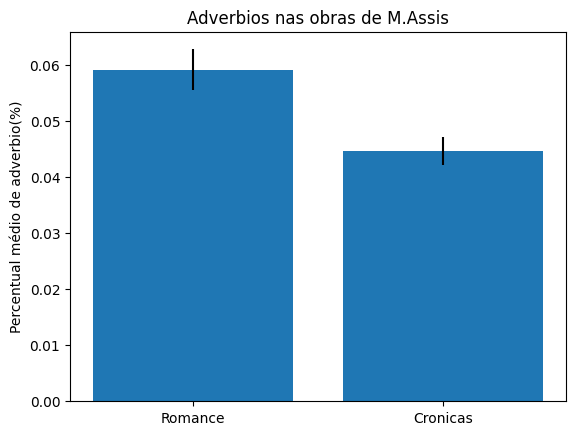

In [37]:
import matplotlib.pyplot as plt

tipo_obra = ["Romance", "Cronicas"]

x = [0,1]
y = [rom_m, cron_m]
dp = [rom_dp, cron_dp]

plt.bar(x, y, yerr = dp)
plt.xticks(x, tipo_obra)
plt.ylabel('Percentual médio de adverbio(%)')
plt.title('Adverbios nas obras de M.Assis')

plt.show()

## Passo 4 - Analise de classe gramaticais

In [42]:
# limpeza para classificação

lixo = ['PUNCT', 'SPACE', 'X', 'SYM', 'NUM']
pos2 = [pos for (pal,pos) in etiq if pos not in lixo]

In [43]:
from collections import defaultdict

cont = defaultdict(int)

for p in pos2:
  cont[p] += 1

nomes = cont.keys()
ocorrencias = cont.values()


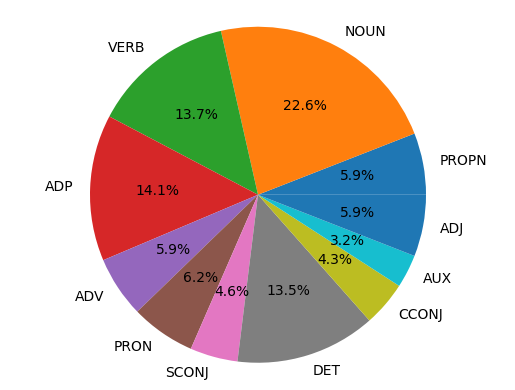

In [44]:
plt.pie(ocorrencias, labels=nomes,autopct="%1.1f%%")
plt.axis('equal')

plt.show()